In [1]:
from Model.Energy.gaussian import GaussianEnergy, GeneralizedGaussianEnergy
from Model.Energy.gaussian_mixture import GaussianMixtureEnergy, GeneralizedGaussianMixtureEnergy 
import torch
import matplotlib.pyplot as plt

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Isotropic Gaussian

In [2]:
data = torch.randn(10000, 2)

In [3]:
isotropic_gaussian = GaussianEnergy(dim = 2, learn_mu=True, learn_sigma=True, )

In [4]:
isotropic_gaussian.mu.data = torch.tensor([0.0, 0.0])
isotropic_gaussian.log_sigma.data = torch.tensor([0.0, 0.0])

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


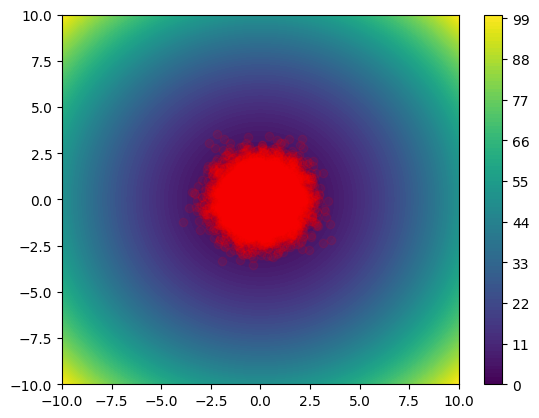

In [5]:
# Plot the energy :
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.zeros_like(X)
for i in range(100):
    for j in range(100):
        Z[i, j] = isotropic_gaussian(torch.tensor([X[i, j], Y[i, j]])).detach().cpu().item()

plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), color='r', alpha=0.1)
plt.show()

## Anisotropic Gaussian

tensor([[0.6250, 0.5000],
        [0.5000, 0.6250]])
tensor([[0.6250, 0.5000],
        [0.5000, 0.6250]])


/var/folders/j8/dm7qjtj55w3f6yvlj6rd2vx40000gn/T/ipykernel_38182/4057320378.py:6: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1626.)
  cholesky = torch.cholesky(variance_matrix)


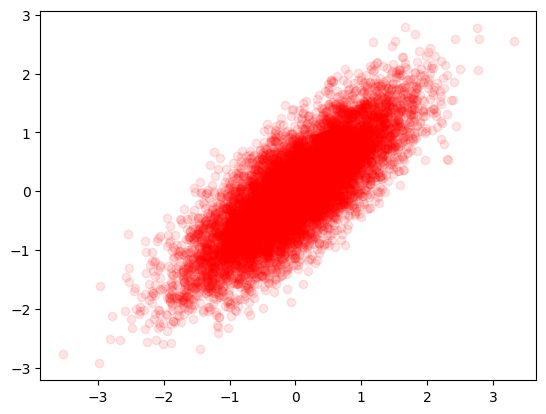

In [6]:

variance_matrix = torch.tensor([[1.0, 0.5], [0.5, 1.0]])
# project matrix to symetric positive definite matrix
variance_matrix = (variance_matrix @ variance_matrix.t())/2
print(variance_matrix)

cholesky = torch.cholesky(variance_matrix)
print(cholesky @ cholesky.t())
data = torch.distributions.MultivariateNormal(torch.tensor([0.0, 0.0]), scale_tril=cholesky).sample((10000,))

plt.scatter(data[...,0].numpy(), data[...,1].numpy(), color='r', alpha=0.1) 




In [7]:
anisotropic_gaussian = GeneralizedGaussianEnergy(dim = 2, learn_mu=True, learn_sigma=True, )
anisotropic_gaussian.L_sigma_inv.data = torch.linalg.inv(cholesky)
anisotropic_gaussian.mu.data = torch.zeros((2,), dtype=torch.float32)

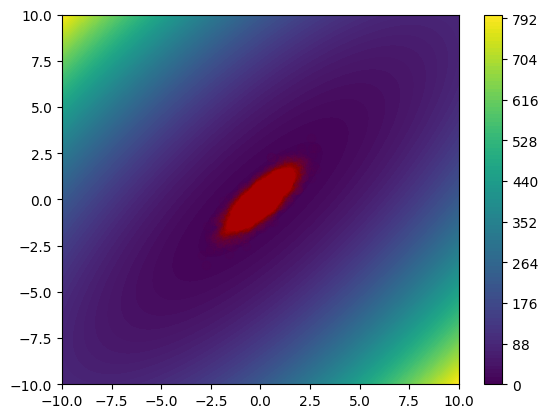

In [8]:
# Plot the energy :
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.zeros_like(X)
X_flat = X.flatten()
Y_flat = Y.flatten()    
Z = anisotropic_gaussian.energy(torch.stack((X_flat, Y_flat), dim=1)).reshape(X.shape).detach().cpu().numpy()
plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.scatter(data[:, 1].numpy(), data[:, 0].numpy(), color='r', alpha=0.01)
plt.show()

# Mixture

# Univariate 

In [9]:
data_1 = torch.randn(10000, 2) * 0.5 + 2
data_2 = torch.randn(10000, 2) * 0.5 - 2
data = torch.cat((data_1, data_2), dim=0)




In [10]:
mixture_isotropic = GaussianMixtureEnergy(dim = 2, num_cluster=2, learn_mu=True, learn_sigma=True, learn_pi=True)
mixture_isotropic.mu.data = torch.tensor([[2.0, 2.0], [-2.0, -2.0]])
mixture_isotropic.log_sigma.data = torch.tensor([[0.0, 0.0], [0.0, 0.0]])




/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/gaussian_mixture.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.log_softmax(self.logit_pi) - energy_per_cluster, dim=-1


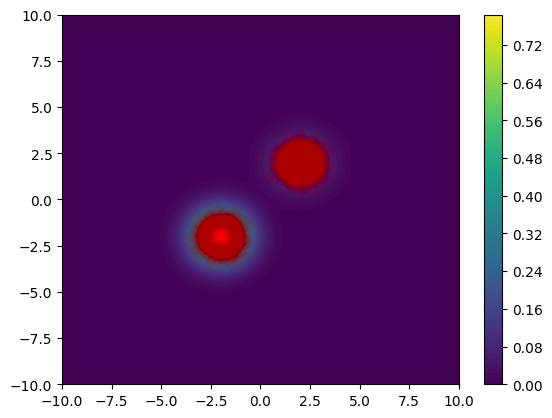

In [ ]:
# Plot the ene# Plot the energy :
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.zeros_like(X)
X_flat = X.flatten()
Y_flat = Y.flatten()    
Z = torch.exp(-mixture_isotropic.energy(torch.stack((X_flat, Y_flat), dim=1))).reshape(X.shape).detach().cpu().numpy()
plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.scatter(data[:, 1].numpy(), data[:, 0].numpy(), color='r', alpha=0.01)
plt.show()

# Multivariate 

variance_matrix_1 tensor([[0.6250, 0.5000],
        [0.5000, 0.6250]])


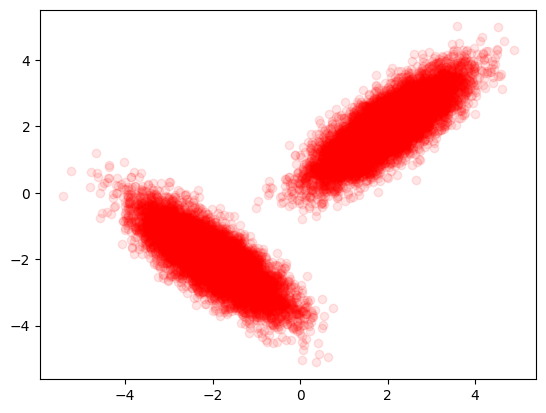

In [12]:

variance_matrix_1 = torch.tensor([[1.0, 0.5], [0.5, 1.0]])
variance_matrix_1 = (variance_matrix_1 @ variance_matrix_1.t())/2
print("variance_matrix_1", variance_matrix_1)
precision_matrix_1 = torch.linalg.inv(variance_matrix_1)
cholesky_1 = torch.cholesky(variance_matrix_1)
cholesky_inv_1 = torch.linalg.inv(cholesky_1)


# =============================================================================
variance_matrix_2 = torch.tensor([[1.0, -0.5], [-0.5, 1.0]])
variance_matrix_2 = (variance_matrix_2 @ variance_matrix_2.t())/2
precision_matrix_2 = torch.linalg.inv(variance_matrix_2)
cholesky_2 = torch.cholesky(variance_matrix_2)
cholesky_inv_2 = torch.linalg.inv(cholesky_2)





##=============================================================================
data_1 = torch.distributions.MultivariateNormal(torch.tensor([2.0, 2.0]), scale_tril=cholesky_1).sample((10000,))
data_2 = torch.distributions.MultivariateNormal(torch.tensor([-2.0, -2.0]), scale_tril=cholesky_2).sample((10000,))
data = torch.cat((data_1, data_2), dim=0)

plt.scatter(data[...,0].numpy(), data[...,1].numpy(), color='r', alpha=0.1) 




In [ ]:
mixture_isotropic = GeneralizedGaussianMixtureEnergy(dim = 2, num_cluster=2, learn_mu=True, learn_sigma=True, learn_pi=True)
mixture_isotropic.mu.data = torch.tensor([[2.0, 2.0], [-2.0, -2.0]])
mixture_isotropic.log_diag.data[0] = torch.log(torch.diag(cholesky_inv_1))
mixture_isotropic.log_diag.data[1] = torch.log(torch.diag(cholesky_inv_2))
mixture_isotropic.under_diag.data[0] = torch.tril(cholesky_inv_1, -1)
mixture_isotropic.under_diag.data[1] = torch.tril(cholesky_inv_2, -1)


tensor([[ 1.2649,  0.0000],
        [-1.6865,  2.1082]])
tensor([[0.6250, 0.5000],
        [0.5000, 0.6250]], grad_fn=<LinalgInvExBackward0>)
tensor([[0.6250, 0.5000],
        [0.5000, 0.6250]])
tensor([[ 0.0000,  0.0000],
        [-1.6865,  0.0000]])
tensor([[ 0.7906,  0.0000],
        [-0.6325,  0.4743]])
tensor([[ 0.6250, -0.5000],
        [-0.5000,  0.6250]], grad_fn=<LinalgInvExBackward0>)
tensor([[ 0.6250, -0.5000],
        [-0.5000,  0.6250]])


/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/gaussian_mixture.py:244: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.log_softmax(self.logit_pi) - energy_per_cluster, dim=-1


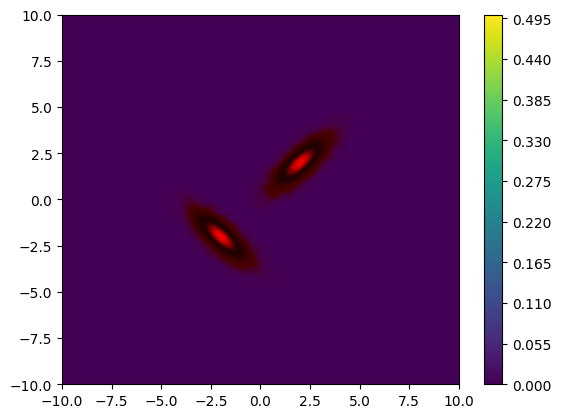

In [14]:


# Plot the ene# Plot the energy :
x = torch.linspace(-10, 10, 100)
y = torch.linspace(-10, 10, 100)
X, Y = torch.meshgrid(x, y)
Z = torch.zeros_like(X)
X_flat = X.flatten()
Y_flat = Y.flatten()    
Z = torch.exp(-mixture_isotropic.energy(torch.stack((X_flat, Y_flat), dim=1))).reshape(X.shape).detach().cpu().numpy()
plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.scatter(data[:, 1].numpy(), data[:, 0].numpy(), color='r', alpha=0.005)
plt.show()
